# 🍬 **Diabetes Dataset**  

We are analyzing the `diabetes_prediction_dataset.csv`. This dataset contains **medical and demographic features** for diabetes prediction, with key patient health indicators.  

## 🎯 **Key Objective**  
The goal is to explore relationships between features and build a **binary classification model** to predict diabetes (`diabetes` column: 1 = diabetic, 0 = non-diabetic).  

---

## 🔍 **Dataset Overview**  
**Rows**: 100,000  
**Columns**: 9   

### **Features**  
| Feature | Type | Description   
|---------|------|-------------  
| **gender** | Categorical | Patient’s gender (`Male`, `Female`, `Other`?)   
| **age** | Numerical (Float) | Patient’s age   
| **hypertension** | Binary (Integer) | `1` = Diagnosed with hypertension, `0` = No hypertension   
| **heart_disease** | Binary (Integer) | `1` = Diagnosed with heart disease, `0` = No heart disease   
| **smoking_history** | Categorical | Smoking status categories: `never`, `former`, `current`, `ever`, `not current`, `No Info`   
| **bmi** | Numerical (Float) | Body Mass Index (BMI)   
| **HbA1c_level** | Numerical (Float) | Hemoglobin A1c (%) – measures average blood sugar over 3 months.   
| **blood_glucose_level** | Numerical (Integer) | Blood glucose level (mg/dL)   
| **diabetes** | Binary (Integer) | Target variable: `1` = Diabetic, `0` = Non-diabetic   




## 📝 **Clinical Reference Ranges & Definitions**

### **1. Hypertension (High Blood Pressure)**  
**Diagnostic Threshold**: Systolic ≥140 mmHg **and/or** Diastolic ≥90 mmHg (confirmed across multiple readings).  
**Implications**:  
  - Major risk factor for heart disease, stroke, and diabetic complications.  
  - Often comorbid with obesity and diabetes.  

---

### **2. BMI Categories**  
| Category | BMI Range | Health Risk |  
|----------|-----------|-------------|  
| **Underweight** | < 18.5 | Increased risk of malnutrition |  
| **Normal** | 18.5 – 24.9 | Lowest health risk |  
| **Overweight** | 25 – 29.9 | Elevated cardiovascular risk |  
| **Obesity** | ≥30 | High risk of diabetes, hypertension |  

---

### **3. Fasting Blood Glucose (FPG)**  
**Units**: mg/dL (milligrams per deciliter) **or** mmol/L (millimoles per liter).  

| Category | mg/dL | mmol/L | Clinical Action |  
|----------|-------|--------|-----------------|  
| **Normal** | 70–99 | 3.9–5.5 | No intervention |  
| **Pre-diabetes** | 100–125 | 5.6–6.9 | Lifestyle modification |  
| **Diabetes** | ≥126 | ≥7.0 | Confirm with HbA1c/test repeat |  
| **Hypoglycemia** | <70 | <3.9 | Immediate treatment required |  

**Key Notes**:  
- **Hyperglycemia** (FPG >125 mg/dL): Sustained levels indicate diabetes risk.  
- **National FPG Average**: Used for population-level health assessments.  

---

### **4. HbA1c (Glycated Hemoglobin)**  
**Purpose**: Reflects **3-month average blood glucose** (less affected by daily fluctuations).  

| Category | HbA1c (%) | Interpretation |  
|----------|-----------|----------------|  
| **Normal** | <5.7 | Low diabetes risk |  
| **Pre-diabetes** | 5.7–6.4 | High risk of progression |  
| **Diabetes** | ≥6.5 | Diagnostic threshold |  

**Clinical Use**:  
- Gold standard for diabetes diagnosis and treatment monitoring.  
- Combines with FPG for accurate diagnosis.  




In [1]:
# import the needed libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset and putting it in df variable
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# I want to see all the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Check for duplicate rows
df[df.duplicated]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [5]:
# Drop duplicated rows if found
df = df.drop_duplicates()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
# Check the count of each feature values
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [7]:
# Check the features values
print(df['gender'].value_counts(), '\n')
print(df['age'].value_counts(), '\n')
print(df['hypertension'].value_counts(), '\n')
print(df['heart_disease'].value_counts(), '\n')
print(df['smoking_history'].value_counts(), '\n')
print(df['bmi'].value_counts(), '\n')
print(df['HbA1c_level'].value_counts(), '\n')
print(df['blood_glucose_level'].value_counts(), '\n')
print(df['diabetes'].value_counts(), '\n')

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64 

age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64 

hypertension
0    88685
1     7461
Name: count, dtype: int64 

heart_disease
0    92223
1     3923
Name: count, dtype: int64 

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64 

bmi
27.32    21666
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
56.10        1
50.27        1
55.04        1
56.65        1
53.37        1
Name: count, Length: 4247, dtype: int64 

HbA1c_level
6.6    8164
5.7    8124
6.5    8051
5.8    7992
6.0    7988
6.2    7958
6.1    7716
3.5    7319
4.8    7296
4.5    7290
4.0    7205
5.0    7155
8.8     660
8.2     659
9.0     652
7.5     642
6.8   

In [8]:
# Check the number of NAN values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Show the common conversion used in statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


## 📊 Exploratory Analysis

C:\Users\OranousCoras\AppData\Local\Temp\ipykernel_18516\3514398250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette='viridis')


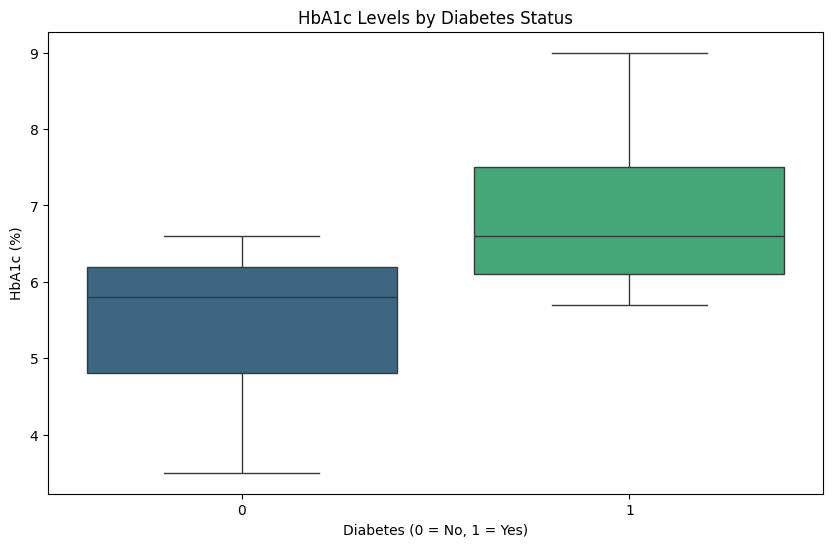

In [10]:
# Diabetes vs. HbA1c distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette='viridis')
plt.title('HbA1c Levels by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('HbA1c (%)')
plt.show()

Text(0.5, 1.02, 'HbA1c vs. Blood Glucose by Diabetes Status')

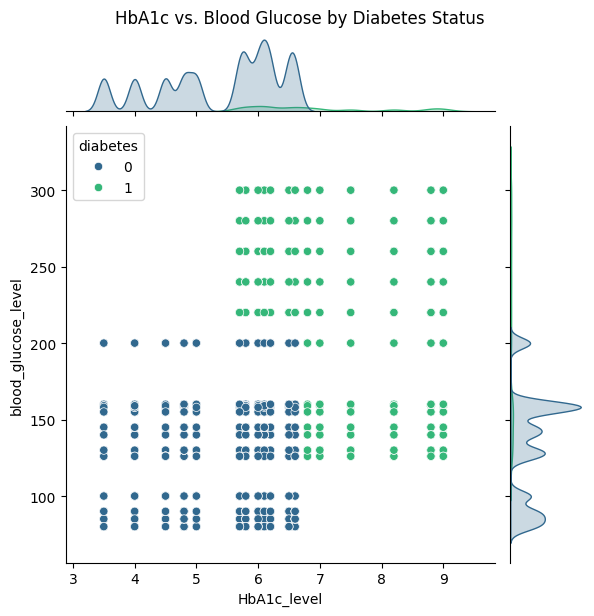

In [11]:
# HbA1c vs. Blood Glucose Correlation
sns.jointplot(data=df, x='HbA1c_level', y='blood_glucose_level',
              hue='diabetes', kind='scatter', palette='viridis')
plt.suptitle('HbA1c vs. Blood Glucose by Diabetes Status', y=1.02)

C:\Users\OranousCoras\AppData\Local\Temp\ipykernel_18516\813731771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='diabetes', y='bmi', palette='coolwarm')


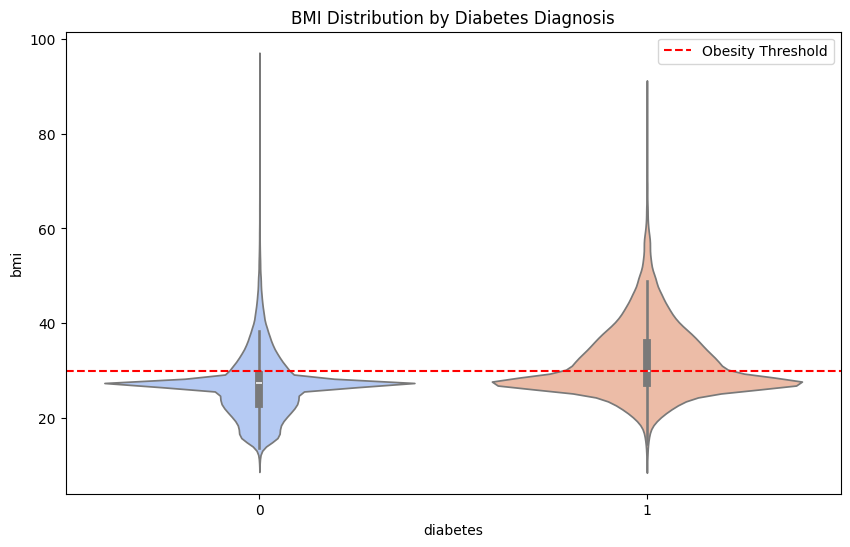

In [12]:
# BMI Distribution by Diabetes Status
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='diabetes', y='bmi', palette='coolwarm')
plt.axhline(30, color='red', linestyle='--', label='Obesity Threshold')
plt.title('BMI Distribution by Diabetes Diagnosis')
plt.legend()

C:\Users\OranousCoras\AppData\Local\Temp\ipykernel_18516\2463503916.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diabetes', palette='Set2')


Text(0, 0.5, 'Count')

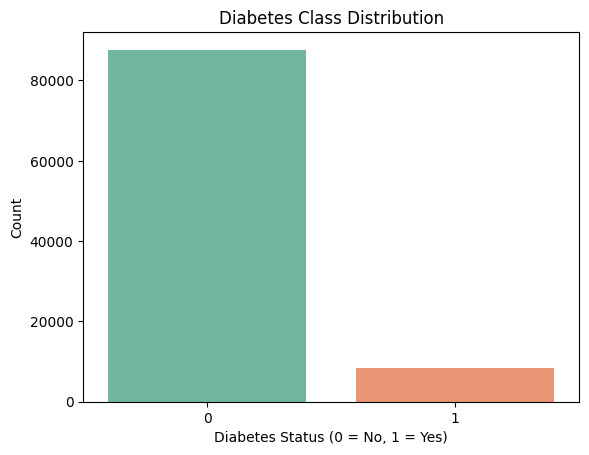

In [13]:
sns.countplot(data=df, x='diabetes', palette='Set2')
plt.title('Diabetes Class Distribution')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Diabetes Prevalence by Gender')

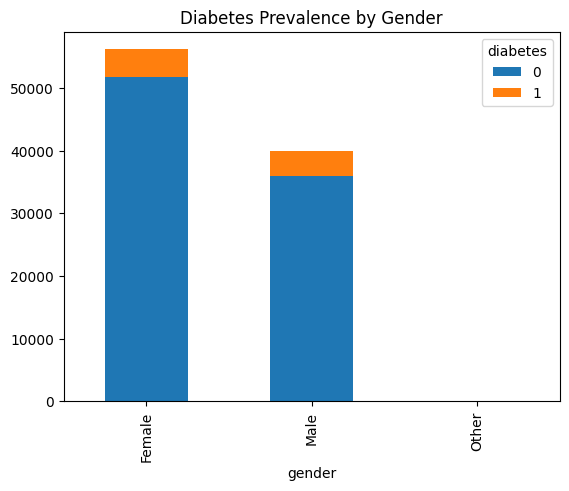

In [14]:
# Gender vs. Diabetes
pd.crosstab(df['gender'], df['diabetes']).plot(kind='bar', stacked=True)
plt.title('Diabetes Prevalence by Gender')


Text(0.5, 1.0, 'Hypertension vs. Heart Disease Co-Occurrence')

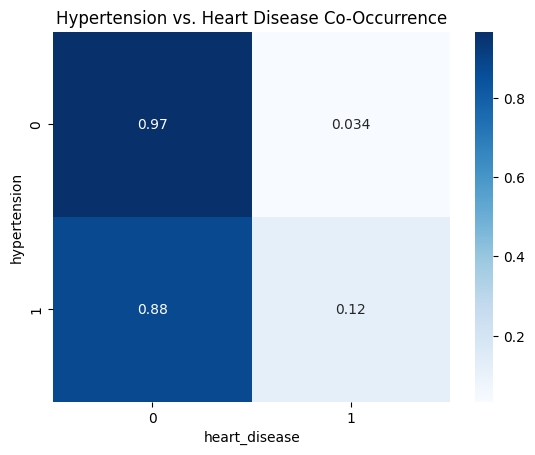

In [15]:
# Hypertension/Heart Disease Heatmap
sns.heatmap(pd.crosstab(df['hypertension'], df['heart_disease'],
                        normalize='index'), annot=True, cmap='Blues')
plt.title('Hypertension vs. Heart Disease Co-Occurrence')

C:\Users\OranousCoras\AppData\Local\Temp\ipykernel_18516\4291997011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='diabetes', y='HbA1c_level', palette='viridis')


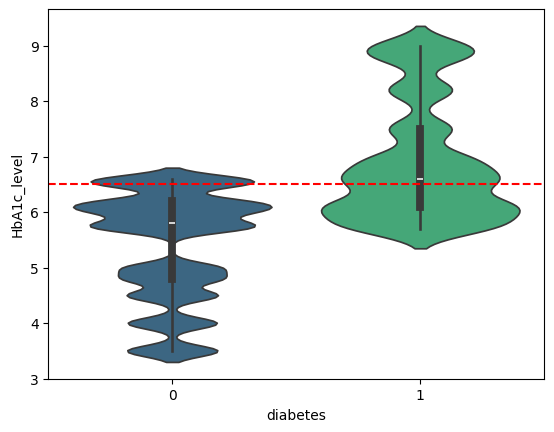

In [16]:
# HbA1c Distribution by Diabetes
sns.violinplot(data=df, x='diabetes', y='HbA1c_level', palette='viridis')
plt.axhline(6.5, color='red', linestyle='--', label='Diabetes Threshold')

C:\Users\OranousCoras\AppData\Local\Temp\ipykernel_18516\3199572603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80])


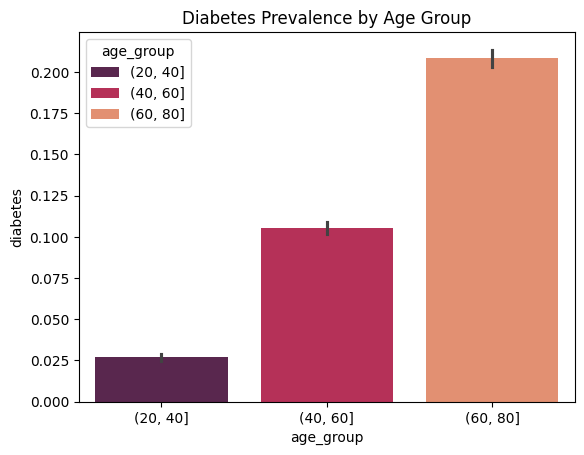

In [17]:
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80])
sns.barplot(data=df, x='age_group', y='diabetes', palette='rocket', hue='age_group')
plt.title('Diabetes Prevalence by Age Group')

df = df.drop(columns='age_group',axis=1)

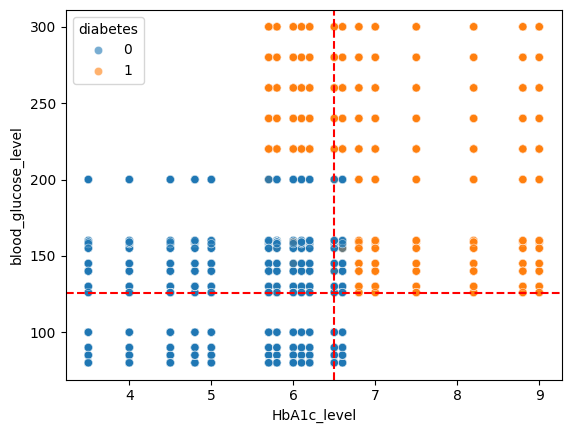

In [18]:
# HbA1c vs. Blood Glucose with Thresholds
sns.scatterplot(data=df, x='HbA1c_level', y='blood_glucose_level',
                hue='diabetes', alpha=0.6)
plt.axvline(6.5, color='red', linestyle='--')  # Diabetes HbA1c threshold
plt.axhline(126, color='red', linestyle='--')  # Diabetes glucose threshold

Text(0.5, 1.0, 'Outlier Detection for Key Features')

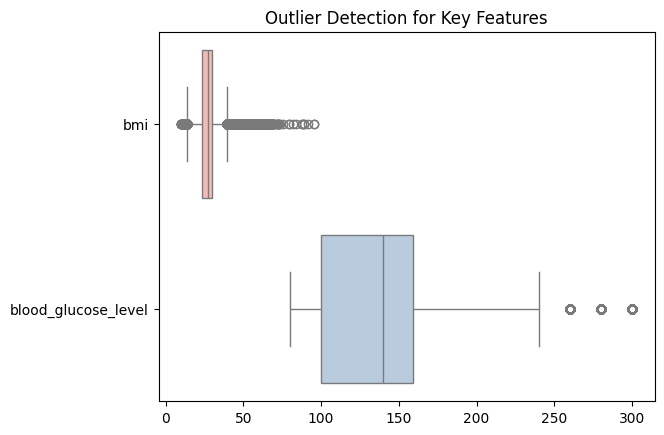

In [19]:
sns.boxplot(data=df[['bmi', 'blood_glucose_level']], orient='h', palette='Pastel1')
plt.title('Outlier Detection for Key Features')

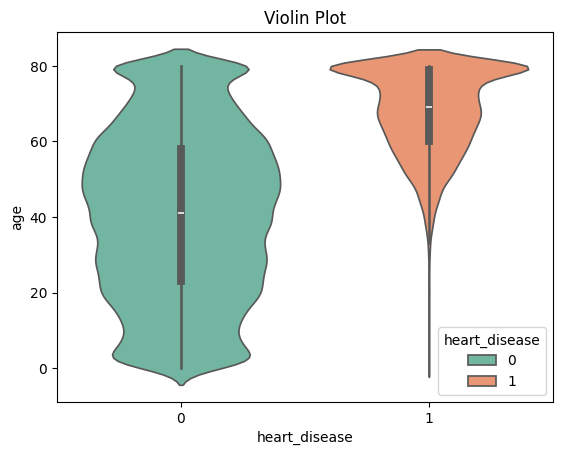

In [20]:
sns.violinplot(x=df['heart_disease'], y=df['age'], hue=df['heart_disease'], palette='Set2')
plt.title('Violin Plot')
plt.show()

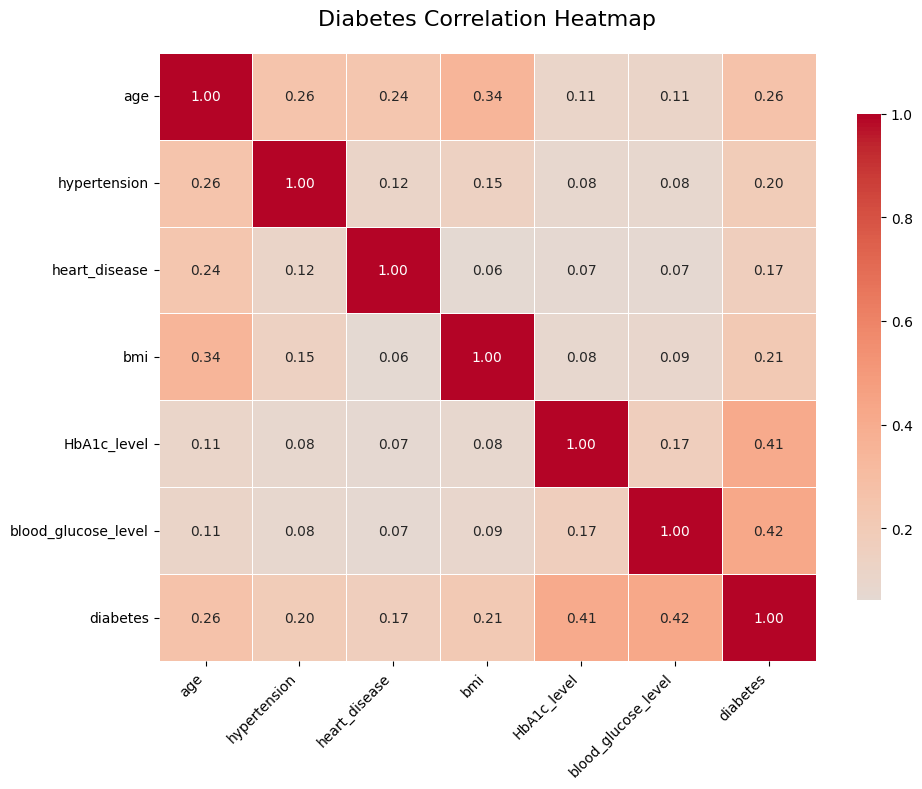

In [21]:
# Corr variable and Heatmap code
corr = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Diabetes Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

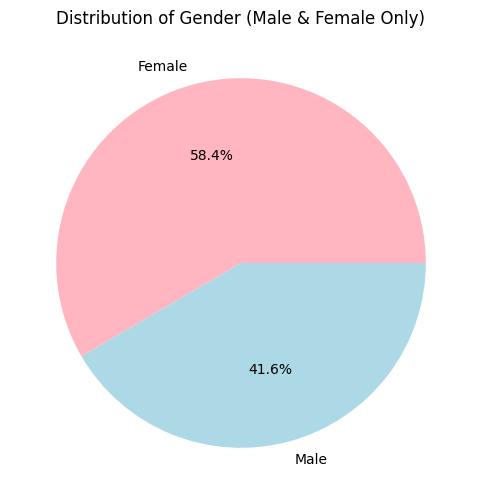

gender
Female    56161
Male      39967
Name: count, dtype: int64


In [22]:
filtered_gender = df[df['gender'].isin(['Male', 'Female'])]
counts = filtered_gender['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title("Distribution of Gender (Male & Female Only)")
plt.show()
print(filtered_gender['gender'].value_counts())


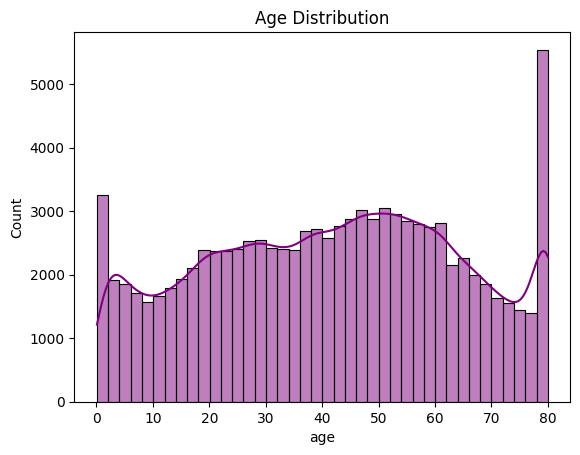

In [23]:
sns.histplot(data = df, x=df['age'], color='purple', kde=True, bins=40)
plt.title('Age Distribution')
plt.show()

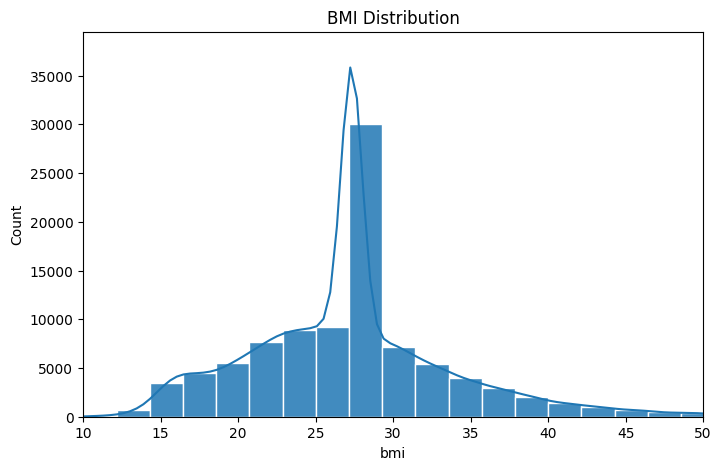

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='bmi', bins=40,
                 edgecolor='white',
                 alpha=0.85,
                 kde=True)

plt.xlim(10, 50) # These line normalize the chart
plt.ylim(0, plt.ylim()[1]*1.05) # These line normalize the chart
plt.title('BMI Distribution')
plt.show()

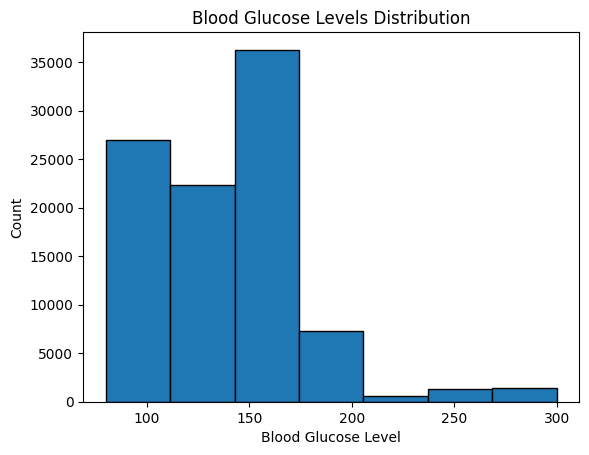

In [25]:
plt.hist(df['blood_glucose_level'], bins=7, edgecolor='black')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Count')
plt.title('Blood Glucose Levels Distribution')
plt.show()

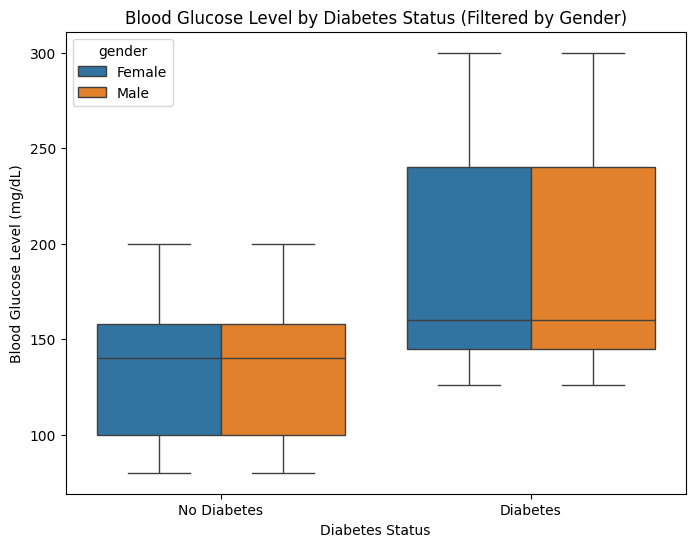

In [26]:
filtered_df = df[df['gender'].isin(['Male', 'Female'])]
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=filtered_df, hue='gender')
plt.title("Blood Glucose Level by Diabetes Status (Filtered by Gender)")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.xlabel("Diabetes Status")
plt.ylabel("Blood Glucose Level (mg/dL)")
plt.show()


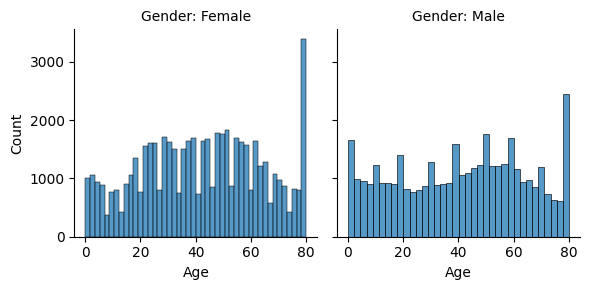

In [27]:
filtered_df = df[df['gender'].isin(['Male', 'Female'])]
g = sns.FacetGrid(filtered_df, col='gender')
g.map(sns.histplot, 'age')
g.set_titles("Gender: {col_name}")
g.set_axis_labels("Age", "Count")
plt.show()


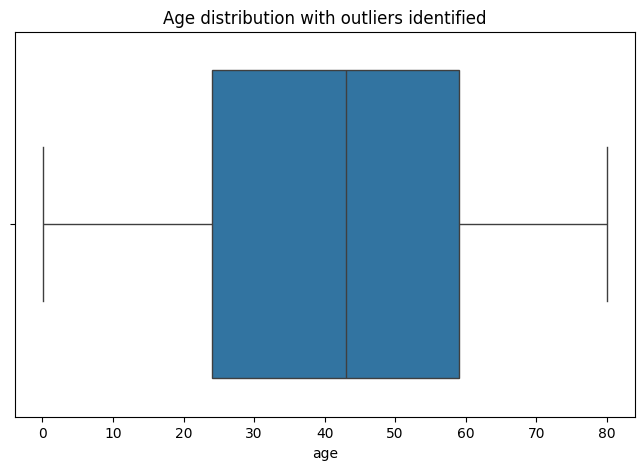

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['age'])
plt.title('Age distribution with outliers identified')
plt.show()

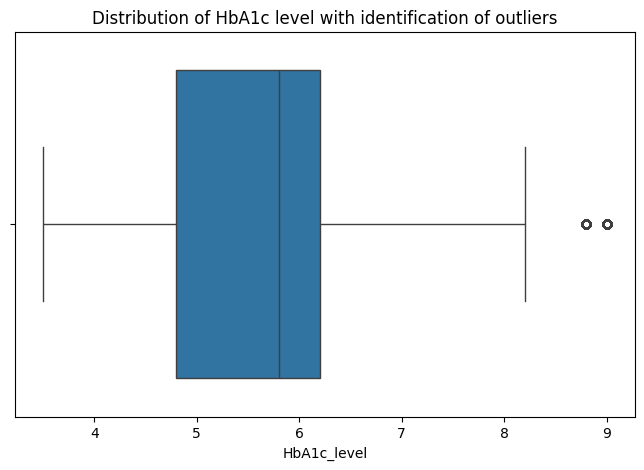

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['HbA1c_level'])
plt.title('Distribution of HbA1c level with identification of outliers')
plt.show()

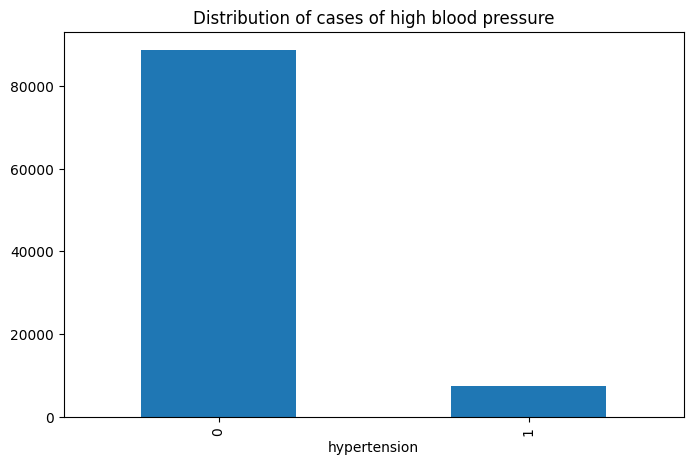

In [30]:
plt.figure(figsize=(8,5))
df['hypertension'].value_counts().plot(kind='bar')
plt.title('Distribution of cases of high blood pressure')
plt.show()

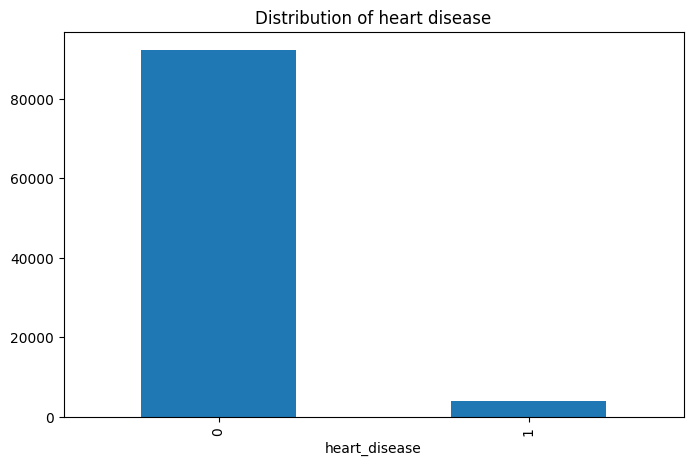

In [31]:
plt.figure(figsize=(8,5))
df['heart_disease'].value_counts().plot(kind='bar')
plt.title('Distribution of heart disease')
plt.show()

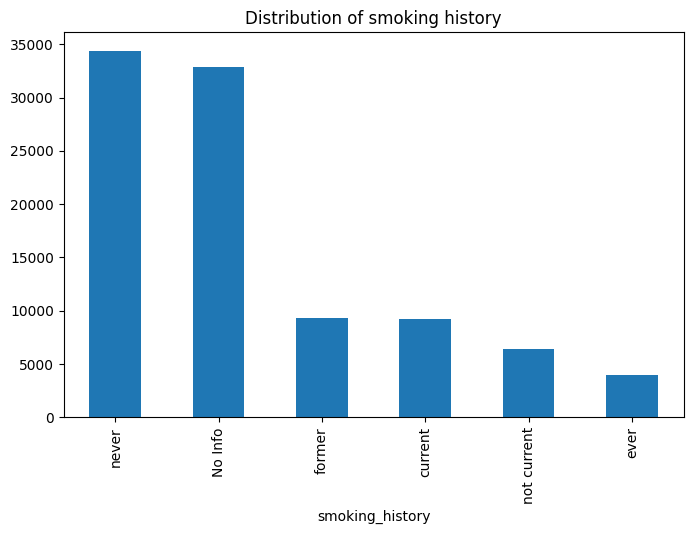

In [32]:
plt.figure(figsize=(8,5))
df['smoking_history'].value_counts().plot(kind='bar')
plt.title('Distribution of smoking history')
plt.show()

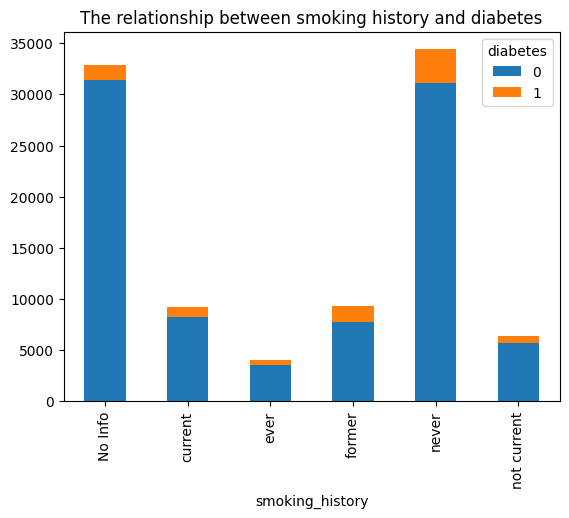

In [33]:
pd.crosstab(df['smoking_history'], df['diabetes']).plot(kind='bar', stacked=True)
plt.title('The relationship between smoking history and diabetes')
plt.show()

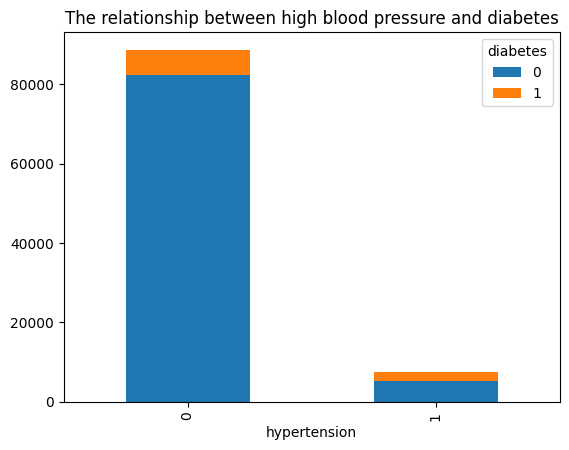

In [34]:
pd.crosstab(df['hypertension'], df['diabetes']).plot(kind='bar', stacked=True)
plt.title('The relationship between high blood pressure and diabetes')
plt.show()

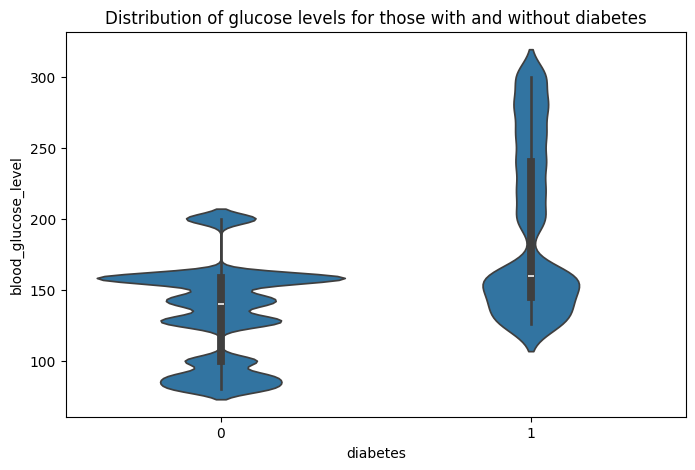

In [35]:
plt.figure(figsize=(8,5))
sns.violinplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Distribution of glucose levels for those with and without diabetes')
plt.show()

## Encoding
Convert Categorical values into numerical ones for correlation and Modeling.

In [36]:
# We convert categorical values into numircal ones, but all of this will be applied on a copy of df
df_ML = df.copy()
df_ML = df_ML[df.gender != 'Other'] # Drop the rows that has Other as gender value

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_ML['gender'] = le.fit_transform(df_ML['gender'])
df_ML['smoking_history'] = le.fit_transform(df_ML['smoking_history'])

df_ML

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


## Spliting dataset

In [37]:
# Extract the target column
y = df_ML['diabetes']

# Drop the target column from the encoded DataFrame
X = df_ML.drop(columns=['diabetes'])

# Display the features and target
print("Features (X):")
print(X)

print("\nTarget (y):")
print(y)


Features (X):
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6             

In [38]:
# 80 % go into the training test, 20% into the validation test
# random_state is the seed for the random split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## check for imbalance in the dataset

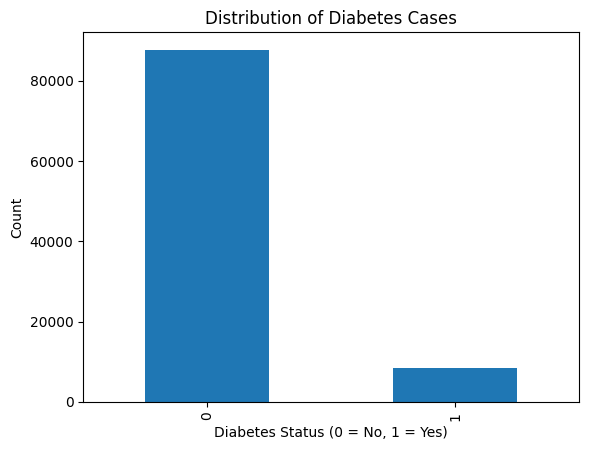

In [39]:
#check for imbalance in the dataset
df['diabetes'].value_counts().plot(kind='bar')
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

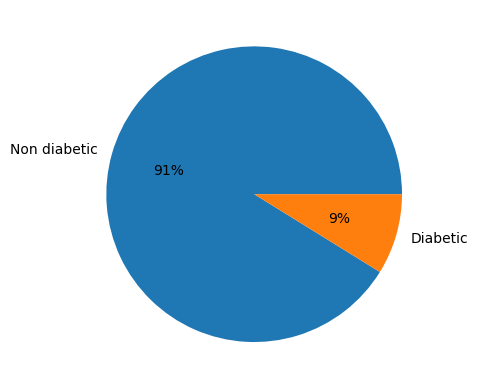

In [40]:
# plotting data on chart 
plt.pie(df['diabetes'].value_counts(), labels=['Non diabetic','Diabetic'], autopct='%0.0f%%') 
  
# displaying chart 
plt.show() 

## Baseline Model with Imbalanced Data

In [41]:
from sklearn.linear_model import LogisticRegression

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Train result
train_score = model.score(X_train, y_train)
# Test Result
test_score = model.score(X_test, y_test)
# The results
print("Train result: ", train_score,"\nTest result: ", test_score)

Train result:  0.9492731008296273 
Test result:  0.9532924165192967


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred_lr = model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9532924165192967
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17564
           1       0.80      0.61      0.69      1662

    accuracy                           0.95     19226
   macro avg       0.88      0.80      0.83     19226
weighted avg       0.95      0.95      0.95     19226



# Handling Imbalanced Data

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [45]:
# 80 % go into the training test, 20% into the validation test
# random_state is the seed for the random split
from sklearn.model_selection import train_test_split
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=7)

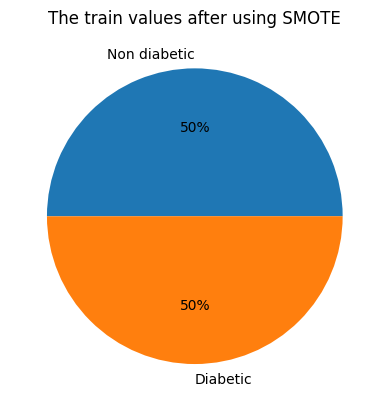

In [46]:
# plotting data on chart 
plt.pie(y_train_res.value_counts(), labels=['Non diabetic','Diabetic'], autopct='%0.0f%%') 

# chart title  
plt.title("The train values after using SMOTE")
# displaying chart 
plt.show() 

Now let's try the base line model again with the balanced data.

## Baseline Model with Balanced Data

In [47]:
# Model Training
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Train result
train_score = model.score(X_train_res, y_train_res)
# Test Result
test_score = model.score(X_test, y_test)
# The results
print("Train result: ", train_score,"\nTest result: ", test_score)

Train result:  0.8870094770845665 
Test result:  0.884109643743404


In [49]:
# Predict on test data
y_pred_lr = model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.884109643743404
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     17514
           1       0.89      0.88      0.88     17545

    accuracy                           0.88     35059
   macro avg       0.88      0.88      0.88     35059
weighted avg       0.88      0.88      0.88     35059



As you can see even so that the accuracy are lower but the precision and recall value for the class 0 are now higher this means that this model is better than the previous even so it have lower accuracy since it can predict the 2 classes with higher precision.

## Machine Learning Models
Now that our data is ready, lets get into Machine & Deep learning 

Imported libraries

In [50]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report ,log_loss, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

Base models

In [51]:
# Base models
model = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model4 = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=6,
    min_child_samples=100,
    reg_alpha=1.0,
    reg_lambda=1.0,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Put the models into one variable for easy use and access
models = {
    'LogisticRegression': model,
    'RandomForest': model2,
    'XGBoost': model3,
    'LightGBM': model4
}

In [52]:
model_scores = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    model_scores[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": acc,
        "report": report,
        "confusion_matrix": cm
    }

    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("=======================================================")
    print("\n")

c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- LogisticRegression ---
Accuracy: 0.884109643743404
Confusion Matrix:
 [[15551  1963]
 [ 2100 15445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     17514
           1       0.89      0.88      0.88     17545

    accuracy                           0.88     35059
   macro avg       0.88      0.88      0.88     35059
weighted avg       0.88      0.88      0.88     35059



--- RandomForest ---
Accuracy: 0.972788727573519
Confusion Matrix:
 [[17088   426]
 [  528 17017]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     17514
           1       0.98      0.97      0.97     17545

    accuracy                           0.97     35059
   macro avg       0.97      0.97      0.97     35059
weighted avg       0.97      0.97      0.97     35059





c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:38:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.9687954590832597
Confusion Matrix:
 [[17284   230]
 [  864 16681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     17514
           1       0.99      0.95      0.97     17545

    accuracy                           0.97     35059
   macro avg       0.97      0.97      0.97     35059
weighted avg       0.97      0.97      0.97     35059



[LightGBM] [Info] Number of positive: 70101, number of negative: 70132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 140233, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499889 -> initscore=-0.000442
[LightGBM] [Info] Start training from score -0.00

**Selection Function**:   
It tell us which model is the best in terms of performances metrics

In [54]:
best_model = None
best_score = 0
best_name = None  # Add this initialization

for name, clf in models.items():
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f'{name} Test Accuracy: {score:.4f}')
    
    if score > best_score:
        best_score = score
        best_model = clf
        best_name = name

# confirm result
print(f'\nBest model: {best_name} with accuracy: {best_score:.4f}')

c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Test Accuracy: 0.8841
RandomForest Test Accuracy: 0.9728


c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:38:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.9688
[LightGBM] [Info] Number of positive: 70101, number of negative: 70132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 140233, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499889 -> initscore=-0.000442
[LightGBM] [Info] Start training from score -0.000442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

**Voting Model**

In [53]:
voting_model = VotingClassifier(
    estimators=[
        ('Logistic Regression', model),
        ('Random Forest', model2),
        ('XGBoost', model3),
        ('LighGBM', model4)
    ],
    voting='hard'
)

voting_model.fit(X_train_res, y_train_res)
y_pred_voting = voting_model.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred_voting)
report = classification_report(y_test, y_pred_voting, output_dict=True)
cm = confusion_matrix(y_test, y_pred_voting)

# Add to model_scores dictionary
model_scores["Voting Classifier"] = {
    "model": voting_model,
    "y_pred": y_pred_voting,
    "accuracy": acc,
    "report": report,
    "confusion_matrix": cm
}

print("--- VotingClassifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))

[LightGBM] [Info] Number of positive: 70101, number of negative: 70132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 140233, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499889 -> initscore=-0.000442
[LightGBM] [Info] Start training from score -0.000442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:38:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 70101, number of negative: 70132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 140233, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499889 -> initscore=-0.000442
[LightGBM] [Info] Start training from score -0.000442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

**Final Results**

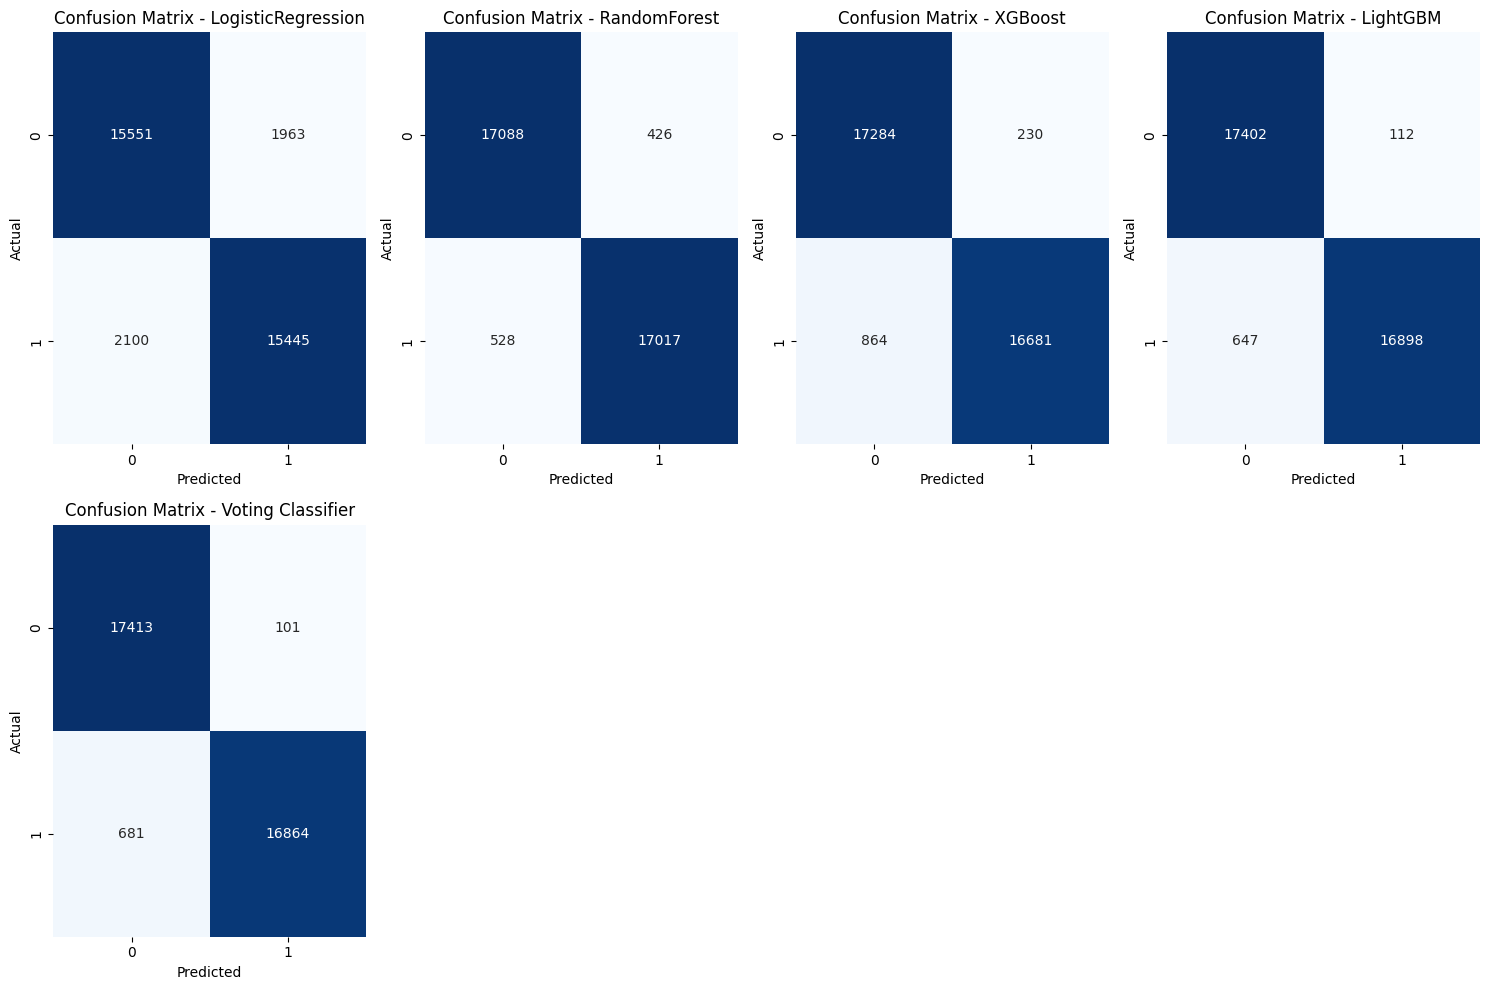

In [55]:
num_models = len(model_scores)
cols = 4
rows = -(-num_models // cols)  # ceiling division without importing math module

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, (name, info) in enumerate(model_scores.items()):
    sns.heatmap(info["confusion_matrix"], annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Turn off any unused subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

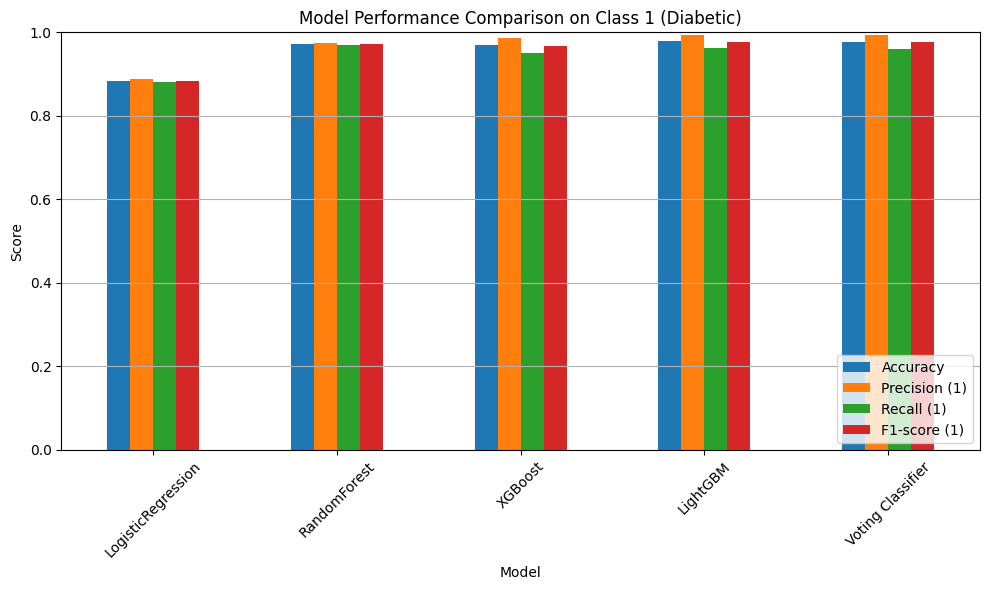

In [56]:
plot_data = [
    {
        "Model": name,
        "Accuracy": info["accuracy"],
        "Precision (1)": info["report"]["1"]["precision"],
        "Recall (1)": info["report"]["1"]["recall"],
        "F1-score (1)": info["report"]["1"]["f1-score"]
    }
    for name, info in model_scores.items()
]

scores_df = pd.DataFrame(plot_data)
ax = scores_df.set_index("Model")[["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)"]].plot(
    kind='bar', figsize=(10, 6)
)

plt.title("Model Performance Comparison on Class 1 (Diabetic)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# LightGBM

purpose of using subsets -->
is to build a learning curve and check:

Is the model underfitting or overfitting?

Does performance improve with more data?

Are we wasting compute training on too much data?

In [57]:
# Training subsets for learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes_abs = []
train_scores = []
val_scores = []
train_losses = []
val_losses = []


for frac in train_sizes:
    # Determine subset size
    size = int(frac * len(X_train_res))
    train_sizes_abs.append(size)

    # Get training subset
    X_subset = X_train_res[:size]
    y_subset = y_train_res[:size]

    model_subset = model5  
    model_subset.fit(X_subset, y_subset)

    # Predictions for accuracy and loss
    y_train_pred = model_subset.predict(X_subset)
    y_val_pred = model_subset.predict(X_test)

    y_train_proba = model_subset.predict_proba(X_subset)
    y_val_proba = model_subset.predict_proba(X_test)

    # Accuracy
    train_scores.append(accuracy_score(y_subset, y_train_pred))
    val_scores.append(accuracy_score(y_test, y_val_pred))

    # Log Loss
    train_losses.append(log_loss(y_subset, y_train_proba))
    val_losses.append(log_loss(y_test, y_val_proba))


NameError: name 'model5' is not defined

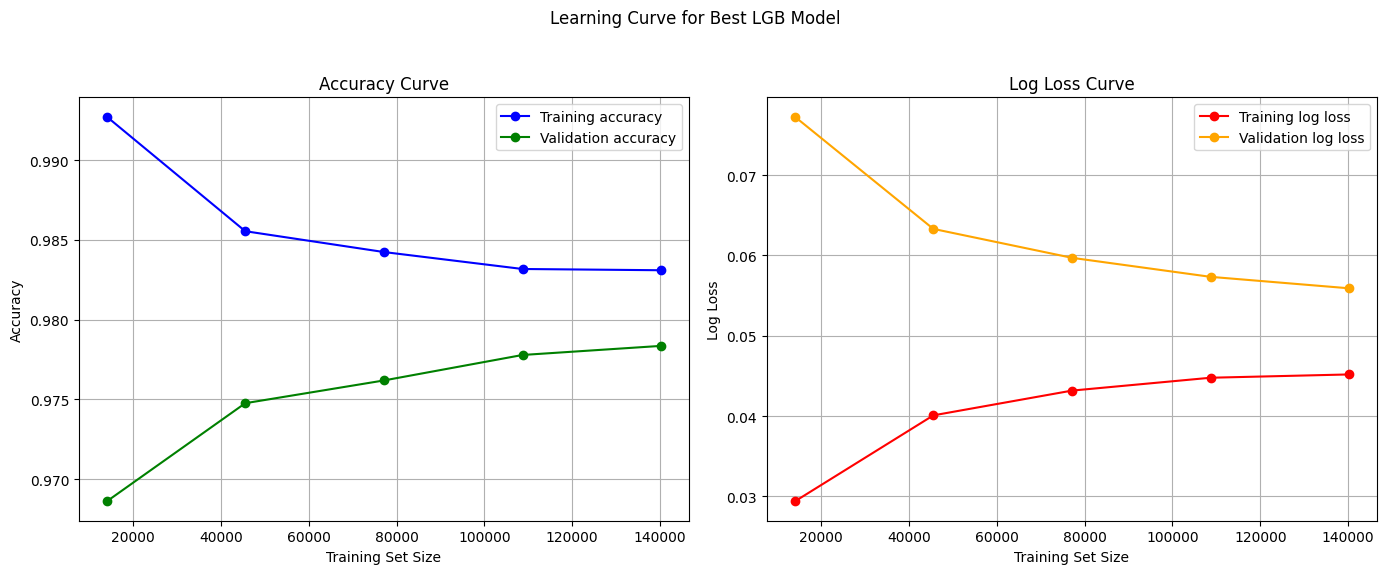

In [ ]:
#=== Plotting ===
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
axs[0].plot(train_sizes_abs, train_scores, 'o-', color='blue', label='Training accuracy')
axs[0].plot(train_sizes_abs, val_scores, 'o-', color='green', label='Validation accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(train_sizes_abs, train_losses, 'o-', color='red', label='Training log loss')
axs[1].plot(train_sizes_abs, val_losses, 'o-', color='orange', label='Validation log loss')
axs[1].set_title('Log Loss Curve')
axs[1].set_xlabel('Training Set Size')
axs[1].set_ylabel('Log Loss')
axs[1].legend()
axs[1].grid(True)

plt.suptitle('Learning Curve for Best LGB Model')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## XGBoost

In [ ]:
# Training subsets for learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes_abs = []
train_scores = []
val_scores = []
train_losses = []
val_losses = []

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search = GridSearchCV(estimator=model4, param_grid=param_grid,
                            scoring='accuracy', cv=5, verbose=1, n_jobs=1)

grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:12:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: 

In [ ]:
for frac in train_sizes:
    # Determine subset size
    size = int(frac * len(X_train_res))
    train_sizes_abs.append(size)

    # Get training subset
    X_subset = X_train_res[:size]
    y_subset = y_train_res[:size]

    model_subset = best_model  
    model_subset.fit(X_subset, y_subset)

    # Predictions for accuracy and loss
    y_train_pred = model_subset.predict(X_subset)
    y_val_pred = model_subset.predict(X_test)

    y_train_proba = model_subset.predict_proba(X_subset)
    y_val_proba = model_subset.predict_proba(X_test)

    # Accuracy
    train_scores.append(accuracy_score(y_subset, y_train_pred))
    val_scores.append(accuracy_score(y_test, y_val_pred))

    # Log Loss
    train_losses.append(log_loss(y_subset, y_train_proba))
    val_losses.append(log_loss(y_test, y_val_proba))


c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:14:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: 

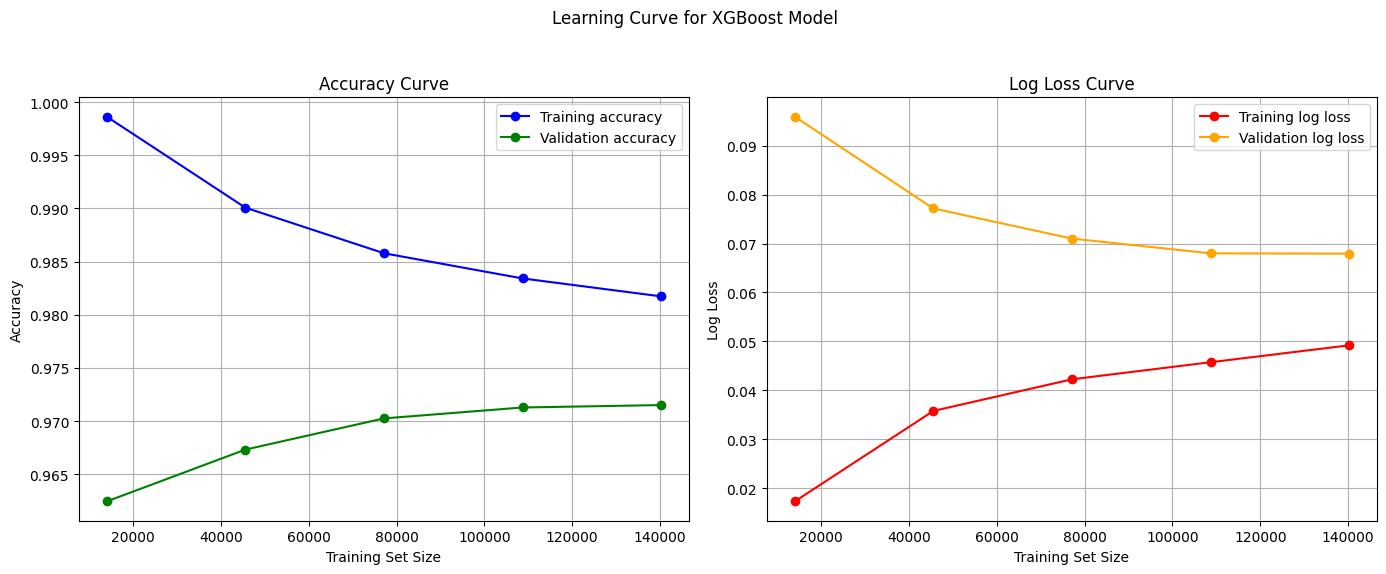

In [ ]:
#=== Plotting ===
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
axs[0].plot(train_sizes_abs, train_scores, 'o-', color='blue', label='Training accuracy')
axs[0].plot(train_sizes_abs, val_scores, 'o-', color='green', label='Validation accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(train_sizes_abs, train_losses, 'o-', color='red', label='Training log loss')
axs[1].plot(train_sizes_abs, val_losses, 'o-', color='orange', label='Validation log loss')
axs[1].set_title('Log Loss Curve')
axs[1].set_xlabel('Training Set Size')
axs[1].set_ylabel('Log Loss')
axs[1].legend()
axs[1].grid(True)

plt.suptitle('Learning Curve for XGBoost Model')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Deep Learning 

Even so Deep learning isn't best suited for these type of predictions, we will use it for the sake of curriosty.

c:\Users\OranousCoras\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6765 - loss: 0.8811 - precision: 0.6554 - recall: 0.7400 - val_accuracy: 0.7060 - val_loss: 0.5172 - val_precision: 0.9774 - val_recall: 0.4255
Epoch 2/10
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8347 - loss: 0.3644 - precision: 0.8112 - recall: 0.8720 - val_accuracy: 0.7983 - val_loss: 0.3906 - val_precision: 0.9666 - val_recall: 0.6206
Epoch 3/10
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8655 - loss: 0.3059 - precision: 0.8482 - recall: 0.8894 - val_accuracy: 0.6641 - val_loss: 0.6541 - val_precision: 0.9991 - val_recall: 0.3329
Epoch 4/10
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8765 - loss: 0.2753 - precision: 0.8639 - recall: 0.8937 - val_accuracy: 0.6575 - val_loss: 0.7159 - val_precision: 0.9996 - val_recall: 0.3196
Epoch 5/10
3506/3506 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8824 - loss: 0.2623 - precision: 0.8715 - recall: 0.8967 - val_accuracy: 0.5680 - va

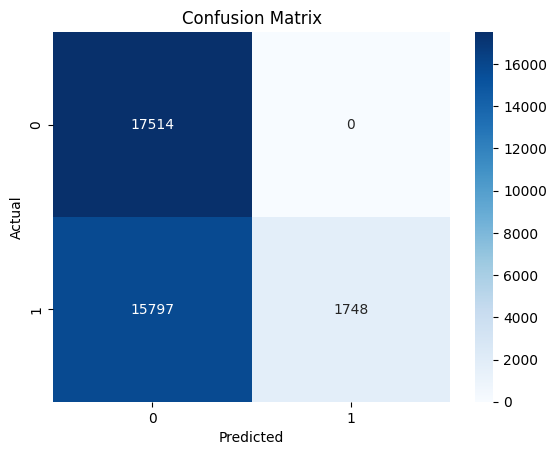

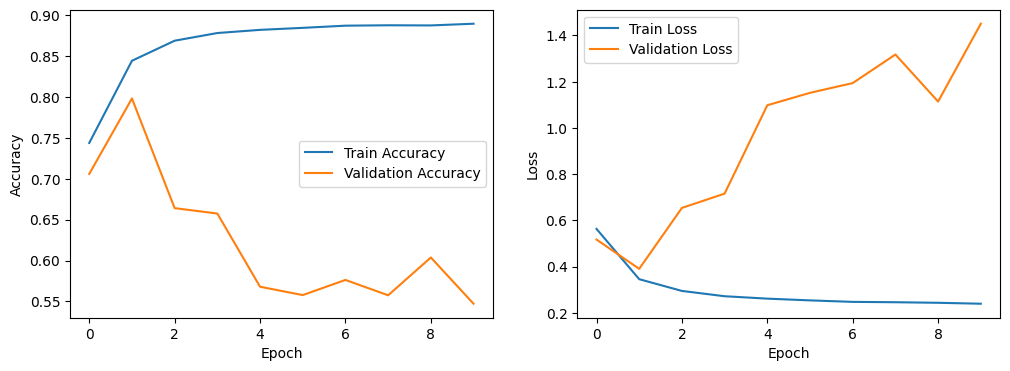

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),  # Input layer
    Dropout(0.3),  # Reduce overfitting
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Train the model
history = model.fit(
    X_train_res, y_train_res,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary classes

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_pred_prob):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# The End

In [ ]:
# Export the dataset used
df.to_csv("diabetes_EDA_V1", index=False)
df_ML.to_csv("diabetes_ML_V1", index=False)